## Inicjalizacja środowiska programistycznego

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import string
from datetime import datetime
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

#append path with python modules
import importlib
import sys
sys.path.append("../modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

#Hide GPU
#tf.config.set_visible_devices([], 'GPU')

2025-03-26 12:17:33.482524: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-26 12:17:33.483317: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-26 12:17:33.568323: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-26 12:17:33.847559: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'plotting_functions'

<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

# Analiza obrazów - Zbiór EMNIST

Jako zbiorów treningowych do analizy obrazów użyjemy rozszerzonego zbioru MNIST -
[EMNIST](https://www.nist.gov/itl/products-and-services/emnist-dataset)
zawierającego dużą liczbę zdjęć ręcznie pisanych liter i cyfr. Zdjęcia mają rozdzielczość `28x28` pikseli,
a każdy piksel koduje poziom szarości w 8 bitowej skali.

# Przygotowanie danych

**Proszę:**

* pobrać zbiór [EMNIST](https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip)
* rozpakować plik .zip
* załadować do środowiska Colab, do katalogu `data` pliki (`label` i `images`) dla zbioru `emnist-digits-test`
* rozpakować w środowisku Colab pliki `.gzip`

**Uwaga:**

* pliki są duże. Optymalnie jest je pobrać bezpośrednio na Colab, lub na dysk Google

In [ ]:
!wget https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip
!unzip gzip.zip
!gzip -d gzip/*test*

--2025-03-25 09:59:05--  https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip
54.85.30.225ometrics.nist.gov (biometrics.nist.gov)... 
connected. to biometrics.nist.gov (biometrics.nist.gov)|54.85.30.225|:443... 
HTTP request sent, awaiting response... 200 OK
Length: 561753746 (536M) [application/zip]
Saving to: ‘gzip.zip’

gzip.zip            100%[===================>] 535.73M  2.40MB/s    in 4m 46s  

2025-03-25 10:03:51 (1.88 MB/s) - ‘gzip.zip’ saved [561753746/561753746]

Archive:  gzip.zip
  inflating: gzip/emnist-balanced-mapping.txt  
  inflating: gzip/emnist-balanced-test-images-idx3-ubyte.gz  
 extracting: gzip/emnist-balanced-test-labels-idx1-ubyte.gz  
  inflating: gzip/emnist-balanced-train-images-idx3-ubyte.gz  
  inflating: gzip/emnist-balanced-train-labels-idx1-ubyte.gz  
  inflating: gzip/emnist-byclass-mapping.txt  
  inflating: gzip/emnist-byclass-test-images-idx3-ubyte.gz  
  inflating: gzip/emnist-byclass-test-labels-idx1-ubyte.gz  
  inflating: gzip/emnist-byclass-t

Dane wczytamy korzystając z gotowej funkcji `getEMNIST(datasetName, datasetPath)` która zwraca krotkę `(features, labels)` dla zbioru o nazwie odpowiadającej nazwie odpowiedniego pliku, np.:
  ```Python
  
  x, y = getEMNIST('emnist-digits-test', datasePath)
  
  ```
  <br></br>

**Proszę:**

* umieścić funkcję w module `modules/emnist_functions.py`  
* rozpakować dane treningowe dla liczb: `emnist-digits-test`
* wydzielić `30 000` przykładów na zbiór uczący
* wydzielić `10 000` przykładów na zbiór walidacyjny

**Uwagi:**

* dane są zapisane w binarnym formacie IDX. Do ich dekodowania można użyć pakietu `idx2numpy`. Pakiet można doinstalować
  do aktualnej sesji korzystając z komendy `pip`. W komórce notatnika komendy linii poleceń trzeba poprzedzić wykrzyknikiem:
  ```Shell
  
  !pip install idx2numpy
  ```
  <br></br>
* zamiast wydzielania explicite zbioru walidacyjnego można użyć parametru `validation_split` metody `keras.model.fit()`:
  ```Python
  
  history = model.fit(x=x_train, y=y_train,
                    epochs=nEpochs,
                    batch_size = batchSize,
                    validation_split=0.1,   # 10% zbioru treningowego wydzielone na zbiór walidacyjny
                    callbacks=callbacks,
                    verbose=0)
  ```

In [ ]:
!pip install idx2numpy

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
def getEMNIST(datasetName, datasetPath):

    import idx2numpy
    fileName = datasetPath+"/"+datasetName+'-images-idx3-ubyte'
    features = idx2numpy.convert_from_file(fileName)

    fileName = datasetPath+"/"+datasetName+'-labels-idx1-ubyte'
    labels = idx2numpy.convert_from_file(fileName)
    return (features, labels)

...rozwiązanie...
pass

Training data shapes:  (30000, 28, 28) (30000,)
Validation data shapes:  (10000, 28, 28) (10000,)


**Proszę:**

* napisać funkcję `plotMNIST(x, y, y_pred)`, która rysuje cztery losowe obrazy ze zbioru cech `x`, podpisane dwoma rodzajami etykiet
  zawartych w macierzach `y` i `y_pred`
* po dopracowaniu kodu funkcji umieścić ją w module `modules/emnist_functions.py`

**Wskazówka:**
* do rysowania obrazów można użyć funkcji `imshow(imgeData)`

/tmp/ipykernel_4144695/3906011576.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0,1].legend(bbox_to_anchor=(1.5,1), loc='upper left', title="Label: True/Predicted")


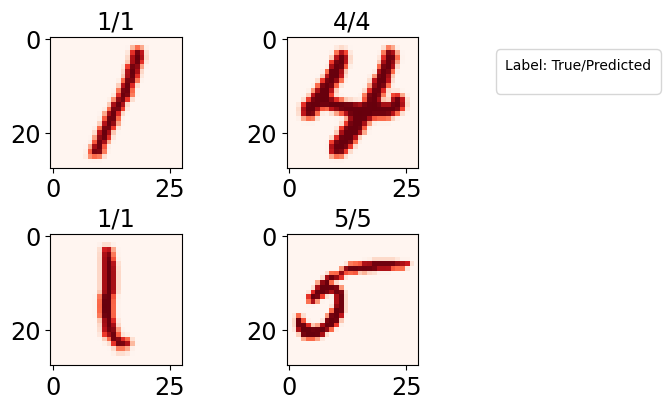

In [ ]:
...rozwiązanie...
pass

**Proszę:**

* wywołać funkcje ładującą dane i rysującą rysunki korzystając z modułu `emnist_functions`

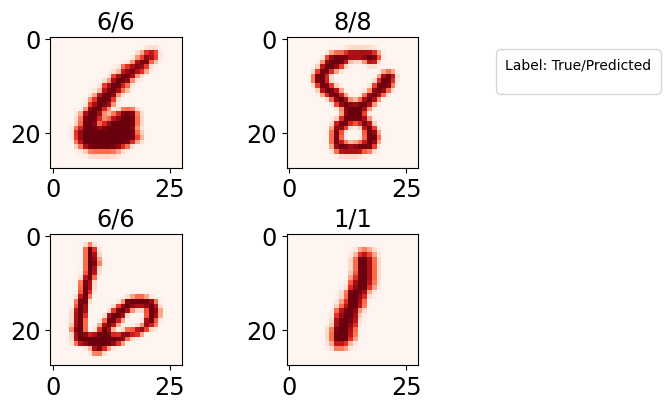

In [ ]:
import emnist_functions as emnist_fcn

datasetName = "emnist-digits-test"
datasetPath = "../data/EMNIST/gzip/"
x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
emnist_fcn.plotMNIST(x, y, y)

**Proszę:**

  * narysować histogramy krotności poszczególnych klas dla zbiorów treningowego i walidacyjnego

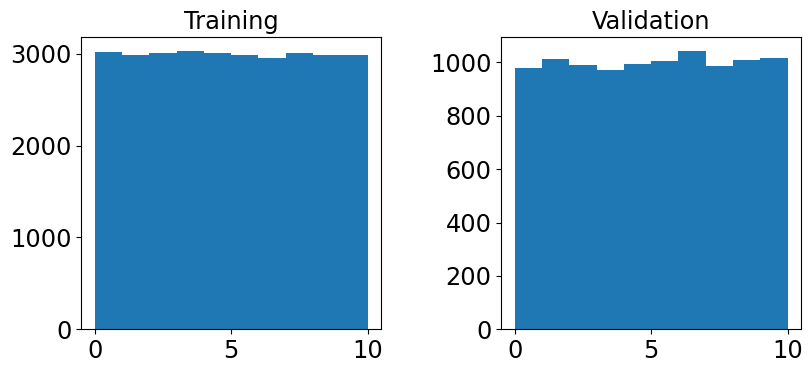

In [ ]:
...rozwiązanie...
pass

## Rozpoznawanie ręcznie pisanych cyfr

Mamy przed sobą zagadnienie kategoryzacji z wieloma klasami. Etykiety klas są podane w postaci numeru klasy:
```Python
print(y_train[:3])
[8 9 6]
```

Sieć, którą skonstruujemy, będzie estymowała prawdopodobieństwo przynależności do klasy na podstawie cech:

$$
{\huge
f_{g}(x) =  P(g|x)
}
$$

następnie użyjemy klasyfikacji Bayesa przypisując klasę o maksymalnym prawdopodobieństwie:

$$
{\huge
g = argmax_{g \in G} f_{g}(x)
}
$$

Jako funkcji straty użyjemy entropii krzyżowej dla wielu kategorii. Mamy do wyboru dwa warianty:

* `sparse_categorical_crossentropy` - implementacja zakładająca, że etykiety zawierają numery klas

* `categorical_crossentropy` - implementacja zakładająca, że etykiety zawierają wektory prawdopodobieństw przynależności do klas:

```Python
x = tf.one_hot(y_train[:3], 10)
print(x)
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(3, 10), dtype=float32)
```  

W naszym przypadku każdy przykład należy do jednej klasy, więc wektor prawdopodobieństw zawiera zera, z wyjątkiem elementu odpowiadającego klasie, do której należy przykład. Taka reprezentacja nazywa się gorąco jedynkową, ang. `one_hot`


* warstwa wyjściowa ma teraz liczbę neuronów równą liczbie klas - każdy neuron zwraca prawdopodobieństwo przynależności do danej klasy
* funkcja aktywacji warstwy wyjściowej powinna być ustawiona na `softmax` by zapewnić normalizację prawdopodobieństwa przykładu do 1:

$$
{\huge
\sum _{g} f_{g}(x) =  1
}
$$

**Proszę:**

* skonstruować sieć w pełni połączoną rozpoznającą ręcznie napisaną cyfrę. Sieć powinna mieć ``128`` neuronów w każdej z
  ``16`` warstw.
* budowa sieci powinna być wykonana z użyciem funkcji `getModel(...)`
* wypisać na ekran podsumowanie sieci

**Uwaga:** proszę zwrócić uwagę na kształt danych wejściowych

In [ ]:
...rozwiązanie...
pass

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 349,450 (1.33 MB)

 Trainable params: 349,450 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

**Proszę:**

* przeprowadzić trening przez `20` epoka i narysować zmianę funkcji straty w kolejnych epokach
* trening powinien uwzględniać harmonogram współczennika uczenia
* trening **nie** powinien używać wczesnego zatrzymania - chcemy zbadać efekty zbyt długiego treningu
* obliczyć dokładność, `accuracy` na zbiorach treningowym i walidacyjnym
* skomentować wykresy funkcji straty - **Czy widać na nich oznaki przetrenowania?**

I0000 00:00:1742894668.188260 4146211 service.cc:145] XLA service 0x753f1c019250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742894668.188278 4146211 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
I0000 00:00:1742894668.188280 4146211 service.cc:153]   StreamExecutor device (1): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2025-03-25 10:24:28.238674: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-25 10:24:28.607609: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1742894669.976650 4150409 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1125', 436 bytes spill stores, 436 bytes spill loads

I0000 00:00:1742894671.095423 4146211 asm_compiler.cc:369] ptxas 

Evaluation on training dataset:
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.9863 - loss: 0.0563   
Evaluation on validation dataset:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.9711 - loss: 0.1296
CPU times: user 52.8 s, sys: 1.91 s, total: 54.7 s
Wall time: 25.8 s


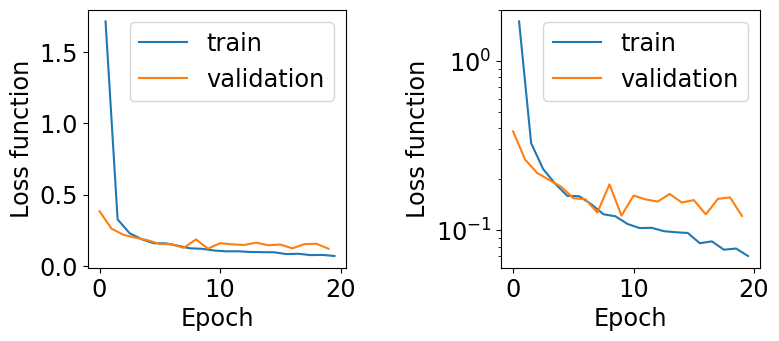

In [ ]:
%%time
...rozwiązanie...
pass

**Proszę:**

* użyć kryterium Bayesa do skonstruowania finalnej odpowiedzi modelu na pytanie **Do której klasy należy dany przykład?**
* narysować macierz pomyłek dla zbioru treningowego i walidacyjnego
* macierze pomyłek proszę znormalizować względem prawdziwych etykiet.

**Wskazówka:** do rysowania macierzy pomyłek można użyć klasy `sklearn.metrics.ConfusionMatrixDisplay`

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step    
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step


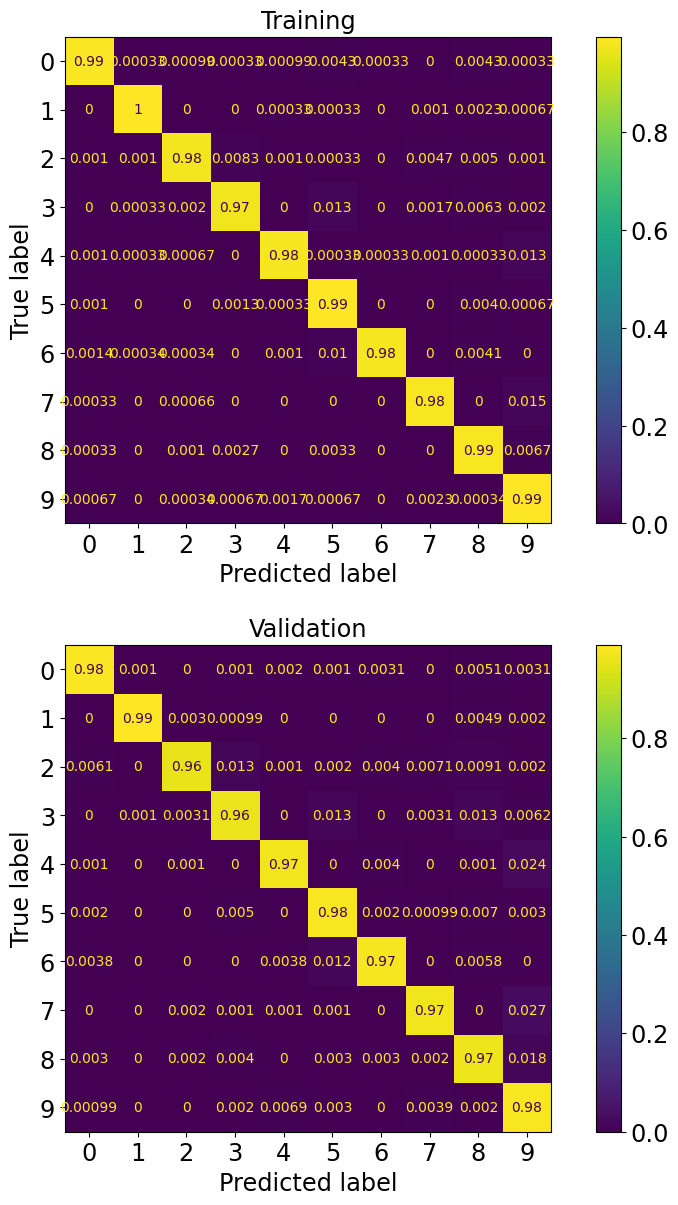

In [ ]:
...rozwiązanie...
pass

**Proszę:**

* narysować cztery losowe przykłady z informacją etykietach: prawdziwej i przyznanej przez model
* narysować cztery przykłady, w których odpowiedź modelu **nie** jest poprawna

/tmp/ipykernel_4144695/3906011576.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0,1].legend(bbox_to_anchor=(1.5,1), loc='upper left', title="Label: True/Predicted")


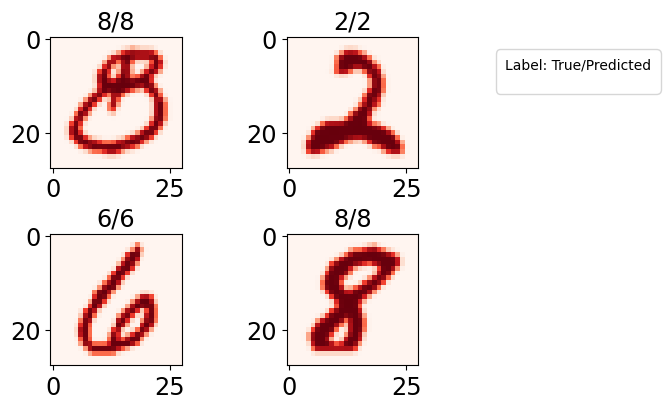

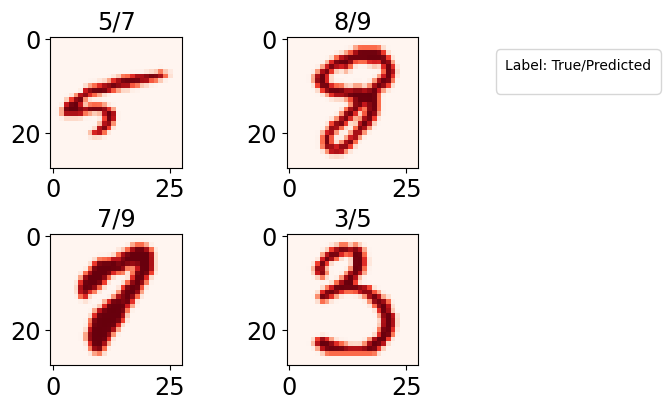

In [ ]:
...rozwiązanie...
pass

## Zapis modelu

Model stworzony w Keras może być zapisany w całości - struktura i wagi lub jako same wagi.
W nazwie pliku modelu warto zakodować podstawowe meta dane o treningu, np. datę i liczbę epok.

In [ ]:
currentTime = datetime.now().strftime("%b_%d_%Y_%H_%M")
path = "training/{epoch:04d}_"+currentTime+".keras"
model.save(path.format(epoch=nEpochs));

## Wczytywanie modelu

Model można wczytać w dowolnym innym miejscu kodu. Wczytany model pozwala na te same operacje co oryginalny model "z kodu",
w szczególności:

* kontynuację treningu
* wykonanie predykcji

In [ ]:
nEpochsSaved = 20
checkpoint_path = "training/{epoch:04d}_"+currentTime+".keras"
model = tf.keras.models.load_model(checkpoint_path.format(epoch=nEpochsSaved))
model.summary()
print(colored("Evaluation on validation dataset:","blue"))
model.evaluate(x_val, y_val)

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,048,351 (4.00 MB)

 Trainable params: 349,450 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 698,901 (2.67 MB)

Evaluation on validation dataset:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9711 - loss: 0.1296    


[0.12170662730932236, 0.972599983215332]

## Zapis modelu w trakcie treningu

Model można automatycznie zapisywać w trakcie procesu treningu - służą do tego dedykowane funkcje wywołań zwrotnych - ```callbacks```. Funkcja ```tf.keras.callbacks.ModelCheckpoint``` zapisuje model w trakcie treningu:

```Python
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                            filepath=checkpoint_filepath, # ścieżka do plików modelu. Wymaga odpowiedniego formatowania
                                                          # jeśli pliki modeli nie mają być nadpisywane, np.:
                                                          # checkpoints/model_{epoch:02d}.keras
                                                          # jeśli zapisyujemy tylko wagi nazwa pliku musi kończyć się na weights.h5
                            save_weights_only=True,       # flaga sterująca zapisem całej struktury modelu, lub jedynie jego wag
                            monitor='val_accuracy',       # kryterium wyboru najlepszego modelu na danym etapie treningu
                            mode='max',                   # kierunek kryterium: max - więcej znaczy lepiej, min - odwrotnie
                            save_best_only=True)          # zapisuje model jeśli jest lepszy niż model poprzednio zapisany
```    

**Proszę:**

* dodać wywołanie zwrotne `ModelCheckpoint` do konfiguracji treningu modelu
* zadbać o odpowiednie nazewnictwo plików modelu

In [ ]:
...rozwiązanie...
pass


Epoch 1: val_accuracy improved from -inf to 0.97120, saving model to training/checkpoints/model_checkpoint_epoch_01.weights.h5

Epoch 2: val_accuracy did not improve from 0.97120

Epoch 3: val_accuracy improved from 0.97120 to 0.97550, saving model to training/checkpoints/model_checkpoint_epoch_03.weights.h5

Epoch 4: val_accuracy did not improve from 0.97550

Epoch 5: val_accuracy did not improve from 0.97550

Epoch 6: val_accuracy did not improve from 0.97550

Epoch 7: val_accuracy did not improve from 0.97550

Epoch 8: val_accuracy improved from 0.97550 to 0.97630, saving model to training/checkpoints/model_checkpoint_epoch_08.weights.h5

Epoch 9: val_accuracy did not improve from 0.97630

Epoch 10: val_accuracy did not improve from 0.97630

Epoch 11: val_accuracy did not improve from 0.97630

Epoch 12: val_accuracy improved from 0.97630 to 0.97640, saving model to training/checkpoints/model_checkpoint_epoch_12.weights.h5

Epoch 13: val_accuracy improved from 0.97640 to 0.97850, sa

## Wczytywanie wag.

Jeśli w trakcie treningu zapisywano same wagi, trzeba je wczytać do istniejącego modelu:
```Python
checkpoint_path = "training/checkpoints/model_checkpoint_epoch_01.weights.h5"
model.load_weights(checkpoint_path)
model.summary()
```

**Proszę:**

* stworzyć nowy model
* obliczyć dokładność na zbiorze walidacyjnym - jakiej wartości się spodziewamy dla `surowego` modelu?
* wczytać wagi modelu zapisane przez funkcję ``tf.keras.callbacks.ModelCheckpoint``
* obliczyć dokładność na zbiorze walidacyjnym. Czy widać, że model zawiera wagi będące efektem treningu?

In [ ]:
...rozwiązanie...
pass

Evaluation on validation dataset:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1066 - loss: 131.2704    


/home/akalinow/.local/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1 variables whereas the saved optimizer has 69 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 349,450 (1.33 MB)

 Trainable params: 349,450 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

Evaluation on validation dataset:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.9687 - loss: 0.1689


# Zadanie domowe

Trening klasyfikatora na zbiorze małych liter i cyfr ze zbioru `emnist-balanced-train`.

**Proszę:**

* wczytrać zbióry `emnist-balanced-train` i `emnist-balanced-test`(uwaga pliki są duże i długo ładują się na Colab!)
* wybrać przykłady o numerze klasy mniejszym niż 36, czyli cyfry i wielkie litery
* zdefiniować i przeprowadzić trening modelu.
  **Kod powinien jedynie używać funkcji zdefiniowanych w komórkach
  zadania domowego i module `emnist_functions`**
* kod treningu i rysowania powinien znaleźć się w odzielnych komórkach
* wypisać na ekran dokładność, `accuracy`, modelu na zbiorach treningowym i testowym
* dla zbiorów treningowego i testowego narysować macierze pomyłek z odpowiednimi etykietami na osiach
* wskazać klasy, które słabo się separują
* odkodować komunikat zapisany w pliku [encoded.npz](http://studenci.fuw.edu.pl/~akalinow/encoded.npz)
    * plik zawiera macierz o kształcie `(-1,28,28)` którą można wczytać następująco:
    ```Python
    
    fileName = "encoded.npz"
    with open(fileName, 'rb') as file:
        encoded = np.load(file)
    ```
* odkodowany komunikat wypisać na ekran w postaci napisu:
```Python
Decoded message is: HELLO WORLD

```    

In [ ]:
#Input data loading
...rozwiązanie...
pass

2025-03-25 10:27:27.819489: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 547178688 exceeds 10% of free system memory.
2025-03-25 10:27:28.364822: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 547178688 exceeds 10% of free system memory.
2025-03-25 10:27:28.889133: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 547178688 exceeds 10% of free system memory.
2025-03-25 10:27:29.653688: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 547178688 exceeds 10% of free system memory.


Training data shapes: (533993, 28, 28) (533993,)
Test data shapes: (89264, 28, 28) (89264,)
Number of categories: 36


2025-03-25 10:27:42.107879: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1507139648 exceeds 10% of free system memory.
I0000 00:00:1742894868.233507 4146216 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_subtract_fusion_6', 864 bytes spill stores, 1736 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_subtract_fusion_4', 864 bytes spill stores, 1736 bytes spill loads

I0000 00:00:1742894883.838747 4146213 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_subtract_fusion_5', 864 bytes spill stores, 1736 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_subtract_fusion_4', 864 bytes spill stores, 1736 bytes spill loads



Evaluation on training dataset:
16688/16688 ━━━━━━━━━━━━━━━━━━━━ 14s 819us/step - accuracy: 0.7859 - loss: 1.3203
Evaluation on test dataset:
2790/2790 ━━━━━━━━━━━━━━━━━━━━ 3s 994us/step - accuracy: 0.7860 - loss: 1.3206
CPU times: user 12min 27s, sys: 35.8 s, total: 13min 3s
Wall time: 11min 51s


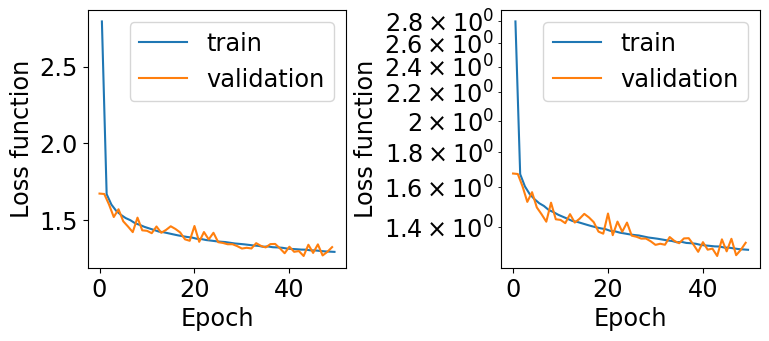

In [ ]:
%%time
importlib.reload(emnist_fcn);

#model definition and training
...rozwiązanie...
pass

I0000 00:00:1742895586.629734 4187846 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_45', 48 bytes spill stores, 64 bytes spill loads



4122/4172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

I0000 00:00:1742895592.237454 4188120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_45', 48 bytes spill stores, 48 bytes spill loads



4172/4172 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


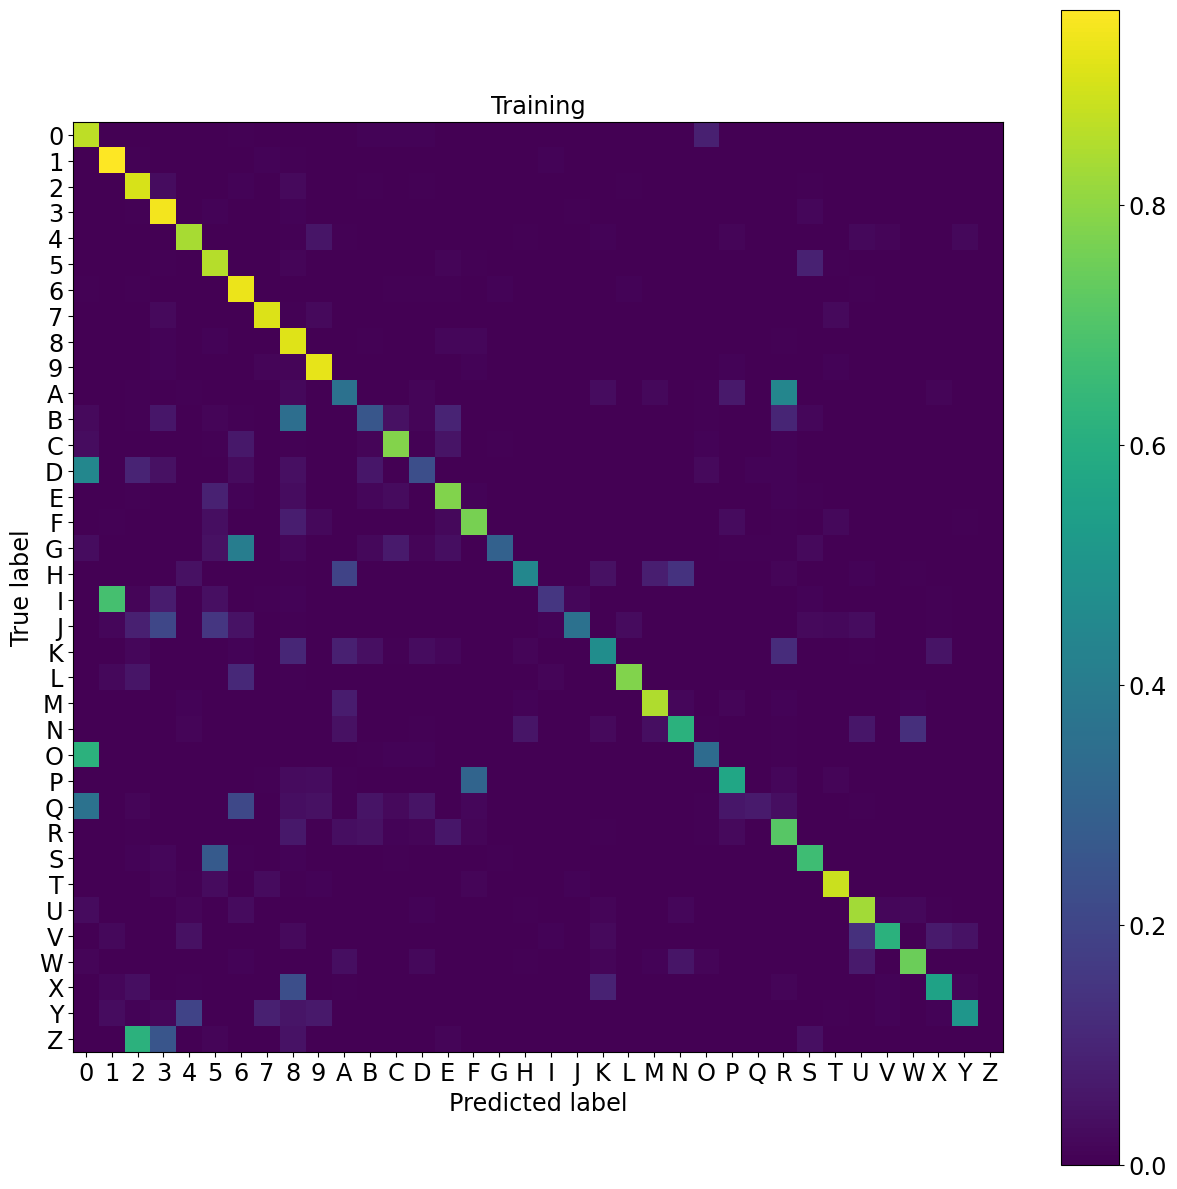

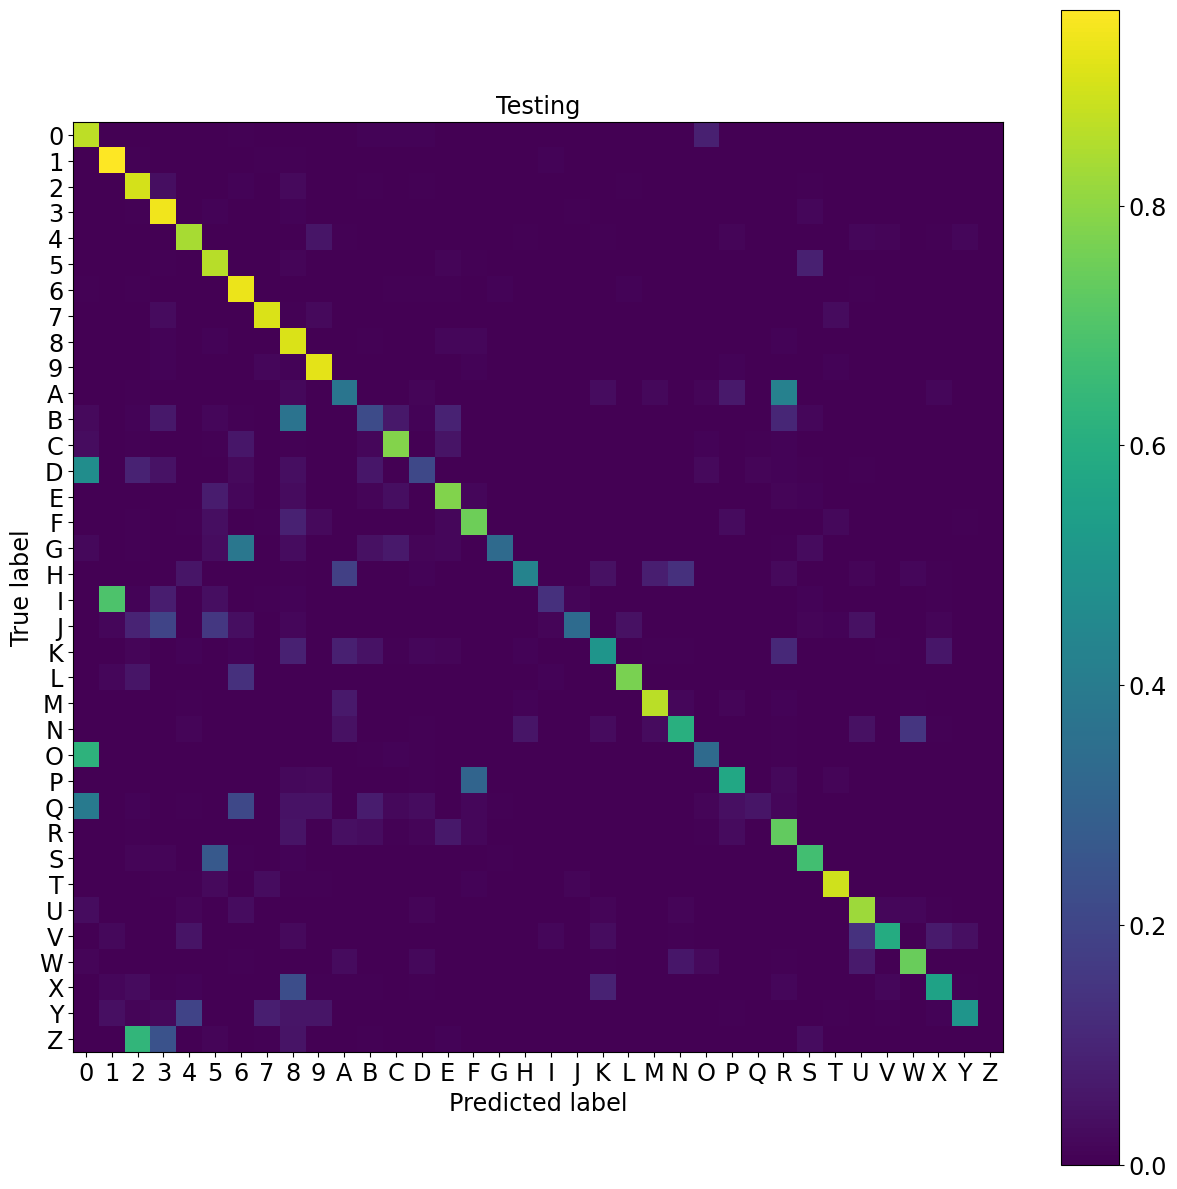

In [ ]:
#evaluation
...rozwiązanie...
pass

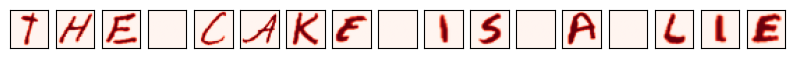

In [ ]:
...rozwiązanie...
pass

In [ ]:
#message decoding
...rozwiązanie...
pass

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Decoded message is: 76E CABE 1S A 21E
